# The Spark Foundation - Data Science & Business Analytics Intership

# Task - 1 Prediction using Supervised Machine Learning
####           In this task we have to predict the percentage of marks that a student is expected to score based upon the number of hours they have studied. 

# Author : Sultan Shaikh

# Batch - January 2022 

In [1]:
# First we will Import all Libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Step 1 - Importing and Reading Data 

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
students_data = pd.read_csv(url)
print("data imported successfully")

students_data.head()

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Checking Not null values
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Step 2 - Plotting  the Data

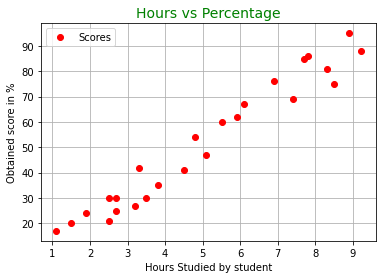

In [4]:
# Plotting the distribution of scores
students_data.plot(x='Hours', y='Scores', style='o',color='red',markersize=6)  
plt.title('Hours vs Percentage',color='green',size=14)  
plt.xlabel('Hours Studied by student')  
plt.ylabel('Obtained score in %')
plt.grid()
plt.show()

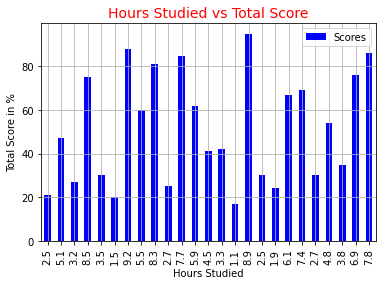

In [5]:
students_data.plot.bar(x='Hours', y='Scores',color='blue')
plt.title('Hours Studied vs Total Score',color='red',size=14)
plt.xlabel('Hours Studied',size=10)  
plt.ylabel('Total Score in %',size=10)
plt.grid()
plt.show()

In [6]:
#corr used for correaltion between variable
students_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### After plotting different graphs , we have observed Positive Correlation between Study   as Study Hours increases,Total Score also increases.

#### Step 3 - Preparing the data

In [7]:
X = students_data.iloc[:, :-1].values  
Y = students_data.iloc[:, 1].values 

#### Step 4 - We will divide the data for training and testing the model

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

#### Step 5 - Training the Algorithm 
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [10]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, Y_train) 

print("Training completed.")

Training completed.


#### Step 6 - Visualizing The Model

In [11]:
# Plotting the regression line
m=model.coef_
c=model.intercept_
line = m*X+c

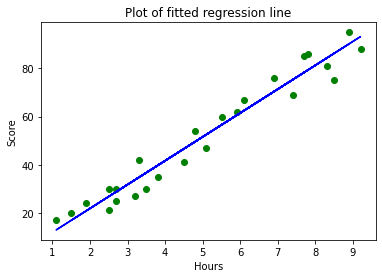

In [12]:
# Plotting for the test data
plt.scatter(X, Y,color='green' )
plt.plot(X, line,color='blue')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Plot of fitted regression line')
plt.show()

#### Step 7 - Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
Y_predicted=model.predict(X_train)
Y_pred = model.predict(X_test) # Predicting the scores
print("The Predicted scores based on testing dataset is:",Y_pred)

The Predicted scores based on testing dataset is: [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [14]:
#checking accuracy of the model
M=model.score(X_test,Y_test)
print("Model Accuracy is",M*100,'%')

Model Accuracy is 94.54906892105356 %


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


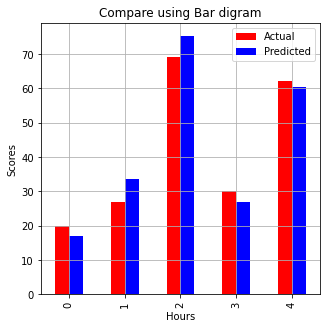

In [16]:
# Plotting the Bar graph to find the difference between the Actual and Predicted value
df.plot(kind='bar',color=('r','b'),figsize=(5,5))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Compare using Bar digram")
plt.grid()
plt.show()


#### Step 8 - Evaluating the model using the given test dataset

In [17]:
# Testing with our own data
hours = np.array([[9.25]])
own_prediction= model.predict(hours)
print('The Predicted score for student who studies 9.25 hours is {}'.format(own_prediction[0]))

The Predicted score for student who studies 9.25 hours is 93.69173248737538


#### Step 9 -  Evaluating the model 

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
#Mean Absolute Error 
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975


#### Step 10 - Conclusion

In this task, we have set a suitable linear regression model including two variable. We have created model for that having 94.5% of the variation in scores of the student(dependent variable) based on number of hours of study (independant variable).
According to the  model,we can conclude that if a student studies for 9.25 hrs/day  then the predicted score will be 93.69 %.

                                         Thank You